# Домашнее задание 1

Это домашнее задание по материалам первой и второй недели семестра (1-2 лекции и семинары). Дедлайн по отправке - 23:59 27 сентября.

- Домашнее задание выполняется в этом же Jupyter Notebook'e.

- Файл необходимо переименовать: __Номер группы_Фамилия_Имя__ (без пробелов в начале и конце). Пример: __Б05-100_Иванов_Иван__.

- ДЗ нужно отправлять на __OptimizationHomework@yandex.ru__. Тема письма: __МФТИ_номер задания__ (без пробелов в начале и конце). Для данного ДЗ тема письма: __МФТИ_1__.

- Для решения можно использовать Google Colab, но присылать нужно не ссылку на Colab, а готовый notebook и все необходимые дополнительные файлы.

- Решение каждой задачи/пункта задачи поместите после условия.

- Не забывайте добавлять необходимые пояснения и комментарии.

- В финальной версии, которая будет отправлена на проверку, должны быть удалены все отладочные артефакты. Под таким артефактами подразумеваются любые выводы ячеек, которые никак не прокоментированы в тексте, а также любой массовый/длинный технический вывод (даже если он прокомментирован в тексте).

- При полном запуске решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок.

- Максимальный балл за задание 100.

Желаем успехов!

### Часть 1. Дихотомия и Золотое сечение

__Определение__ Одномерная функция $f: [a,b] \to \mathbb{R}$ называется унимодальной на отрезке $[a,b]$, если существует $c^* \in [a,b]$ такое, что 

1) для любых $a \leq x < y \leq c^*$ имеем $f(x) > f(y)$,

2) для любых $c^* \leq x < y \leq b$ имеем $f(x) < f(y)$.

В этом задании будем минимизировать такого рода функции.

__Задача 1. (всего 15 баллов)__ Рассмотрим метод дихотомии:

```python
def binpoisk(f, a, b, eps):
    c = (a + b) / 2
    while (b - a) > eps:
        d = (a + c) / 2
        if f(d) <= f(c):
            b = c
            c = d
        else:
            e = (b + c) / 2
            if f(c) <= f(e):
                a = d
                b = e
            else:
                a = c
                c = e
    return c
```

__а). (4 балла)__ Докажите корректность для нахождения минимума унимодальной функции.

In [ ]:
#ваше решение

__б). (6 баллов)__ Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{out} - c^*| \leq \varepsilon$)? Т.е. необходимо получить верхнюю оценку на число итераций и подсчета значений $f$ метода дихотомии для минимизации унимодальных функций.

In [ ]:
#ваше решение

__в). (2 балла)__ Придумайте свою унимодальную функцию (постарайтесь придумать не самый тривиальный пример, если совсем не получается обратите внимание на функцию $f(x) = \sin x \cdot e^x$ и модернизируйте ее). Покажите, что она является унимодальной на каком то отрезке. Где у нее находится $c^*$?

In [ ]:
#ваше решение

__г). (3 балла)__ Реализуйте и запустите для этой функции метод дихотомии. Постройте 2 графика сходимости:

1) по оси абцисс - число итераций, по оси ординат - $|c_{out} - c^*|$, 

2) по оси абцисс - число оракульных вызовов $f$, по оси ординат - $|c_{out} - c^*|$.

Нанесите на оба графика теоретическую оценку из пункта б). Сделайте вывод.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (так как на каждом графике будет две линии), толщина линий и т.д.. Графики должны быть удобны для чтения.

In [ ]:
#ваше решение

__Задача 2. (всего 10 баллов)__ Рассмотрим метод золотого сечения:

```python
def golden_ration(f, a, b, eps):
    tau = (1 + sqrt(5)) / 2
    while (b - a) > eps:
        t = (b - a) / tau
        c = b - t
        d = a + t
        if f(d) <= f(c):
            a = c
        else:
            b = d
    return (a + b) / 2
```

__а). (2 балла)__ Докажите корректность и сходимость данного алгоритма для нахождения минимума унимодальной функции.

In [ ]:
#ваше решение

__б). (5 баллов)__ Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{out} - c^*| \leq \varepsilon$)? Лучше или хуже данный алгоритм, чем метод дихотомии? 

_Hint:_ возможно ли улучшения псевдокода метода золотого сечения с точки зрения оракульной сложности?

In [ ]:
#ваше решение

__в). (3 балла)__ Реализуйте метод золотого сечения. Добавьте результаты золотого сечения (теоретические и практические) на графики из пункта 1.г). Сделайте вывод.

In [ ]:
#ваше решение

### Часть 2. Матрично-векторное дифференцирование. Теория

В этой части используется следующие обозначения:

$\mathbb{R}_+$ - неотрицательные вещественные числа

$\mathbb{R}_{++}$ - положительные вещественные числа

$I_d$ - матрица с единицами на диагонали (вне диагонали 0)

$A \in \mathbb{S}^d \quad\Longleftrightarrow \quad A= A^\top$

$A \in \mathbb{S}^d_+ \quad\Longleftrightarrow \quad A \in \mathbb{S}^d ; \quad  \forall x: \quad  x^\top Ax \geq 0$

$A \in \mathbb{S}^d_{++}\quad \Longleftrightarrow \quad A \in \mathbb{S}^d ; \quad \forall x \neq 0: \quad  x^\top Ax > 0$

Норма Фробениуса для матрицы $A \in \mathbb{R}^{d \times d}$ определяется как $||A||_F = \sqrt{\sum_{i=1}^d \sum_{j=1}^d A^2_{ij}}$

Для матриц скалярное произведение определено как $\langle X, Y \rangle := \text{Tr}(X^\top Y)$

__Задача 1. (всего 5 баллов)__ Вычилите первую и вторую производные $f'(t)$ и $f''(t)$ для следующих функций:

__а). (2 балла)__ $f : E \to \mathbb{R}$ - функция $f(t) := \det(A - t I_d)$, где $A \in \mathbb{R}^{d \times d}$, $E := \{ t \in \mathbb{R} : \det(A - t I_d) \neq 0 \}$.

In [ ]:
#ваше решение

__б). (3 балла)__ $f : \mathbb{R}_{++} \to \mathbb{R}$ - функция $f(t) := \| (A + t I_d)^{-1} b \|^2$, где $A \in \mathbb{S}^d_{++}$, $b \in \mathbb{R}^d$.

In [ ]:
#ваше решение

__Задача 2. (всего 9 баллов)__ Вычислите градиент $\nabla f$ и гессиан $\nabla^2 f$ для следующих функций:

__а). (4 балла)__ $f : \mathbb{R}^d \to \mathbb{R}$ - функция $f(x) := \frac{1}{2} \| x x^T - A \|_F^2$, где $A \in \mathbb{S}_{++}^d$.

In [ ]:
#ваше решение

__б). (5 баллов)__ $f : \mathbb{R}^d \setminus \{ 0 \} \to \mathbb{R}$ - функция $\displaystyle f(x) = \langle x, x \rangle^{\langle x, x \rangle}$.

In [ ]:
#ваше решение

__Задача 3. (всего 11 баллов)__ Для каждой из следующих функций $f$ покажите, что вторая производная является знакоопределенной (как квадратичная форма) и установите ее знак:

__а). (5 баллов)__ $f : \mathbb{R}^d_{++} \to \mathbb{R}$ - функция $f(x) := \prod_{i=1}^d x_i^{\alpha_i}$, где $\alpha_1, \dots, \alpha_d \geq 0$, $\sum_{i=1}^d \alpha_i = 1$.

In [ ]:
#ваше решение

__б). (6 баллов)__ $f : \mathbb{S}^d_{++} \to \mathbb{R}$ - функция $f(X) := \langle X^{-1}, A \rangle$, где $A \in \mathbb{S}^d_+$.

In [ ]:
#ваше решение

__Задача 4. (5 баллов)__ Для указанного графа вычислений найдите градиент $\nabla_A L, \nabla_b L$ функции потерь $L$ по входным переменным $A,b$ соответственно. Градиент по $x$ считать известным и равным $\nabla_x L$. Рекомендуется использовать алгоритм backpropogation.

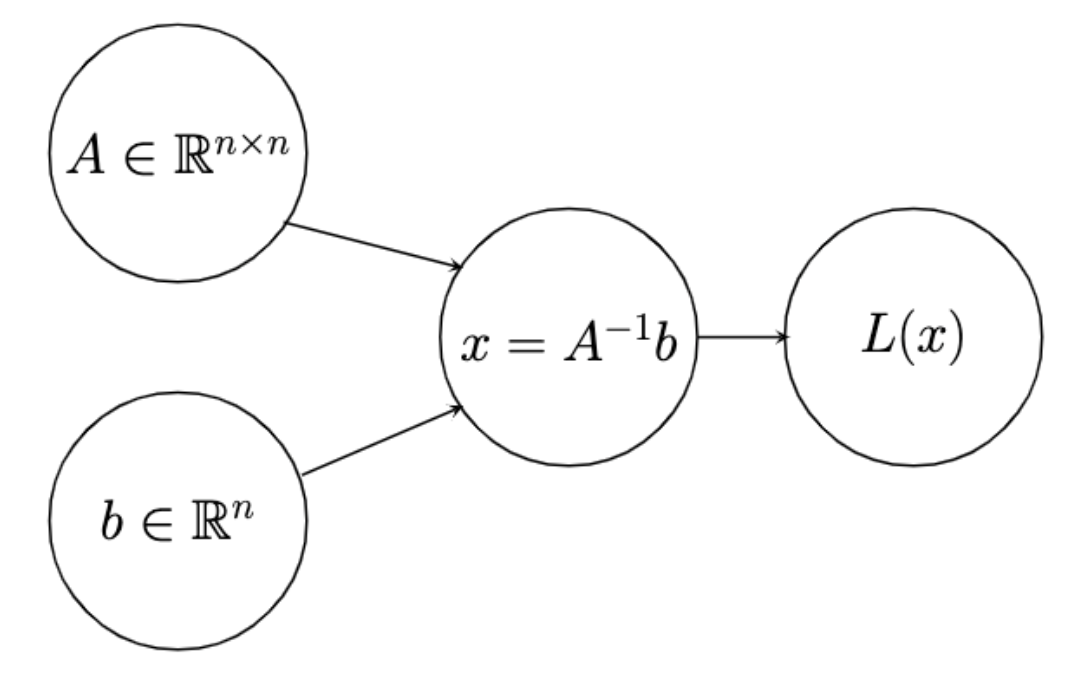

In [ ]:
#ваше решение

### Часть 3. Градиентный спуск

__Задача. (всего 25 баллов)__ Рассмотрим следуюущую задачу оптимизации:

\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$.

__а). (2 балла)__ Является ли данная задача всегда выпуклой/сильной выпуклой? При каких условиях?

In [ ]:
#ваше решение

__б). (4 балла)__ Оцените для этой функции константу сильной выпуклости и константу Липшица градиента.

In [ ]:
#ваше решение

__в). (3 балла)__ Предложите способ генерации матрицы $А$ так, чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$. Докажите, что способ корректен. Диагональная матрица даст только 1 балл в данном пункте.

In [ ]:
#ваше решение

__г). (3 балла)__  Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше, и произвольным вектором $b$ (лучше ненулевым). Желательно уже сейчас и метод, и подсчет градиента реализовывать, как отдельные функции, при этом чтобы метод принимал саму целевую функцию (или ее градиент), как параметр. В дальнейшем будет легче менять целевую функцию в задаче минимизации и тестировать разные методы.

По желанию: можно воспользоваться предложенным ниже вариантом описания функции.

In [ ]:
def gradient_descent(f, nabla_f, x_0, x_sol, gamma_k,
                     K = 10**3, eps = 10**-5, mode = 'x_k - x^*'):
    '''
        f - целевая функция
        nabla_f - градиент целевой функции
        x_0 - стартовая точка
        x_sol - точное решение (оно нужно для подсчета ошибки)
        gamma_k - функция для вычисления шага метода
        K - количество итераций (по умолчанию 1е3)
        eps - желаемая точность (по умолчанию 1е-5)
        mode - критерий сходимости 
               Значения либо 'x_k - x^*' - тогда критерий сходимости будет ||x_k - x^*||,
               либо 'f(x_k) - f(x^*)' - тогда критерий сходимости будет f(x_k) - f(x^*),
               либо 'x_k+1 - x_k', либо 'f(x_k+1) - f(x_k)' (критерии будут аналогичными)

        Функция возвращает точку, в которой достигается минимум и вектор ошибок
    '''
    return

In [ ]:
#ваше решение

__д). (2 балла)__ Для задачи с $d = 50$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$, например, с помощью пакетов линейной алгебры (есть встроенный в numpy). Запустите градиентный спуск на $10^3$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x^0$ (если $b$ ненулевой, то можно взять нулевой $x^0$). Проверьте сходится ли он. В качестве критерия сходимости используйте $\| x_k - x^*\|^2_2$. Постройте график сходимости: по оси абцисс - номер итерации, по ординат - значения критерия на этой итерации. Сделайте вывод о характере сходимости.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д.. Графики должны быть удобны для чтения.

In [ ]:
#ваше решение

__е). (1 балл)__ Добавьте на график теоретическую сходимость, полученную на лекции. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. Сделайте вывод.

In [ ]:
#ваше решение

__ж). (3 балла)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Проверьте диапозон от $0$ до $3/L$. Нанесите все новые запуски на график (теоретическую сходимость можно убрать). На каком шаге получен наибыстрейший результат. Как думаете почему? 

In [ ]:
#ваше решение

__з). (7 баллов)__  Исследуйте другие техники подбора шага: 

1) Уменьшающийся с номером итерации шаг: $\gamma_k = \frac{\gamma}{\delta + k}$ или $\gamma_k = \frac{\gamma}{\delta + \sqrt{k}}$, где $\gamma$ и $\delta$ нужно подобрать отдельно. Какая конфигурация $\gamma$ и $\delta$ показала наилучший результат?

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$. Как будете вычислять значение $\gamma_k$ в данном случае?

3) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2_2}$, где $\alpha \geq 1$ нужно подобрать отдельно. Какое $\alpha$ дало лучший результат?

Сравните все подходы подбора шага между собой (в том числе из предыдуших пунктов). Важно, что сравнивать нужно не только число итераций, но и время работы методов. Постройте графики сравнения и сделайте вывод.

In [ ]:
#ваше решение

### Часть 4. Матрично-векторное дифференцирование. Практика

__Задача. (всего 20 баллов)__ Перед Вами стоит задача приближения матрицы $X  \in \mathbb{R}^{N \times M}$ неизвестными матрицами $U \in \mathbb{R}^{N \times r}, V \in \mathbb{R}^{M \times r}$ заданной размерности $r$.

В качестве такого приближения предлагается использовать линейное представление $\hat{X} = U V^T$.

В рамках данного задания Вам предстоит решить задачу оптимизации функции *MSE*:
$$MSE(X, \hat{X}) = \frac{1}{N M} ||X - \hat{X} ||^2_F = \frac{1}{N M} ||X - U V^T ||^2_F.$$

__a). (3 балла)__ Выпишите формулы для градиентов $\nabla_U MSE, \nabla_V MSE$.

In [ ]:
#ваше решение

__б). (10 баллов)__ Реализуйте версии градиентного спуска для данной задачи на библиотеках ```numpy```, ```jax``` и ```pytorch```. Сгенерируйте случайную матрицу $X$ с $N \geq 10000$, $M \geq 200$. 

По желанию: мы предлагаем использовать следующий код для генерации матрицы $X$.

In [4]:
import numpy as np

def generate_X(N, M):
    x = np.linspace(0, 1, M)
    y = np.linspace(0, 1, N)
    x, y = np.meshgrid(x, y)
    
    non_zero_elements = (N * M ) // 10

    def f(x, y):
        return np.sin(200 * x + 75 * y) + np.sin(50 * x) + np.cos(100 * y)

    S = f(x, y)
    Omega = np.random.choice(N * M, size = non_zero_elements, replace = False)
    Omega = np.unravel_index(Omega, S.shape)
    Y = S[Omega]
    X = np.zeros((N, M))
    X[Omega] = Y
    return X

Возьмите $r = 10$. Запустите все алгоритмы на 100 итераций (это мало для сравнения библиотек, но для теста работоспсобности кода - достаточно). Постройте графики значения отнормированного $MSE$ для каждого из 3 алгоритмов: по оси абцисс - номер итерации $k$, по ординат - $\left(MSE (X, \hat{X}_k) ~/~ MSE (X, \hat{X}_0)\right)$ (здесь $\hat{X}_0$ - стратовое значение).

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (так как на каждом графике будет три линии), толщина линий и т.д.. Графики должны быть удобны для чтения.

In [ ]:
#ваше решение

__г). (7 баллов)__ Оцените эффективность трёх реализаций по сходимости до заданной точности:

- ***проследите, что сравниваете на одном device;***
- добавьте возможность измерения времени работы алгоритмов;
- изменяя $r$ при фиксированной матрице $X$ ($N \geq 10000$, $M \geq 200$), нарисуйте зависимость времени сходимости до некоторого фиксированного отнормированного значения $MSE$ $\left(MSE (X, \hat{X}) ~/~ MSE (X, \hat{X}_0)\right)$ от $r$ (не забудьте указать значение отнормированного $MSE$, которую выбрали, мы рекомендуем брать $10^{-2}-10^{-3}$);
- при фиксированных $r = 10$ и $M \geq 200$, покажите характер поведения аналогичного графика при изменяющемся $N$;
- сделайте выводы.

In [ ]:
#ваше решение